<a href="https://colab.research.google.com/github/kaushaldeep7/python_fundamentals2/blob/main/Random_forest_on_glassdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement

Prepare a model for glass classification
using Random Forest
Data Description:

RI : refractive index

Na: Sodium (unit measurement: weight

percent in corresponding oxide, as are
attributes 4-10)

Mg: Magnesium

AI: Aluminum

Si: Silicon

K:Potassium

Ca: Calcium

Ba: Barium

Fe: Iron

Type: Type of glass: (class attribute)
1 -- building_windows_float_processed
 2 --building_windows_non_float_processed
 3 --vehicle_windows_float_processed
 4 --vehicle_windows_non_float_processed (none in this database)
 5 --containers
 6 --tableware
 7 --headlamps

## Use the Glass dataset and apply the Random forest model.

In [ ]:
# Importing the Libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC

## Import the dataset

In [ ]:
# importing the glass dataset
glass = pd.read_excel('/content/glass.xlsx')

In [ ]:
glass.head(10)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


# 1. Exploratory Data Analysis (EDA):

In [ ]:
# info of the dataset
glass.info()

<class 'pandas.core.frame.DataFrame'>
Index: 213 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      213 non-null    float64
 1   Na      213 non-null    float64
 2   Mg      213 non-null    float64
 3   Al      213 non-null    float64
 4   Si      213 non-null    float64
 5   K       213 non-null    float64
 6   Ca      213 non-null    float64
 7   Ba      213 non-null    float64
 8   Fe      213 non-null    float64
 9   Type    213 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 18.3 KB


In [ ]:
glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518348,13.404085,2.679202,1.449484,72.655070,0.498873,8.954085,0.175869,0.057277,2.788732
std,0.003033,0.816662,1.443691,0.495925,0.773998,0.653185,1.425882,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.810000,3.600000,1.630000,73.090000,0.610000,9.150000,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [ ]:
# checking the null values
glass.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [ ]:
# Checking any duplicated values
glass.duplicated().sum()

1

In [ ]:
glass.drop_duplicates(inplace=True)

In [ ]:
# Checking the data types
glass.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

# 2: Data Visualization:

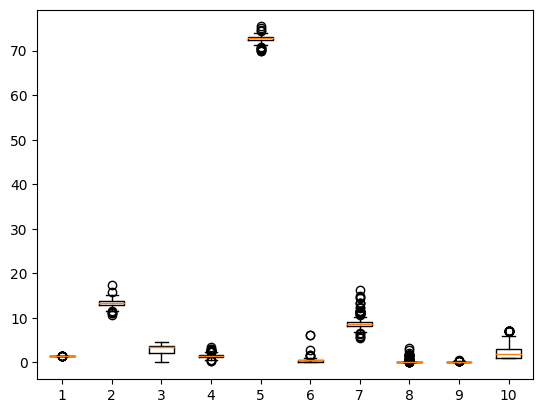

In [ ]:
# Using the boxplot for checking the outliers
plt.boxplot(glass)
plt.show()

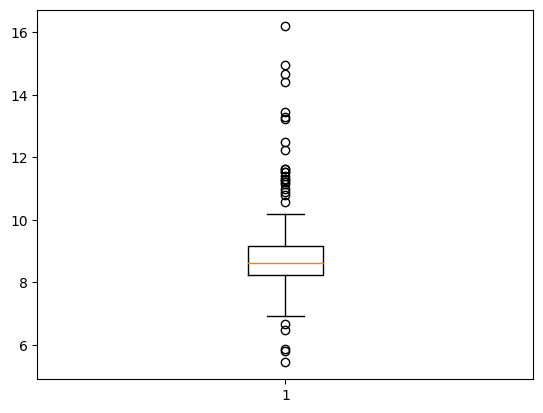

In [ ]:
plt.boxplot(glass['Ca'])
plt.show()

<Axes: ylabel='Ba'>

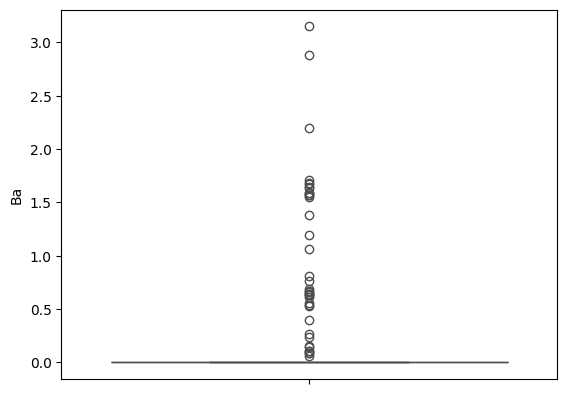

In [ ]:
sns.boxplot(glass['Ba'],color='red')

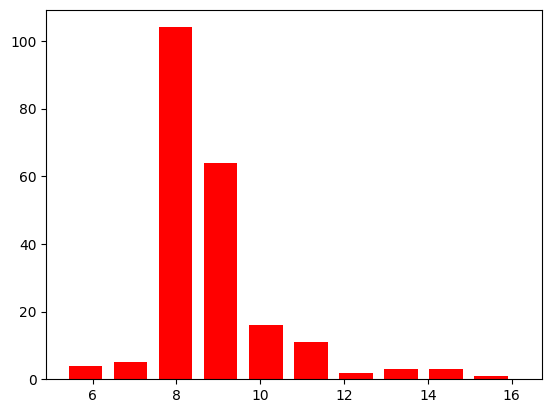

In [ ]:
# checking the data dist by using histogram
plt.hist(glass['Ca'],width=0.8, color='red')
plt.show()

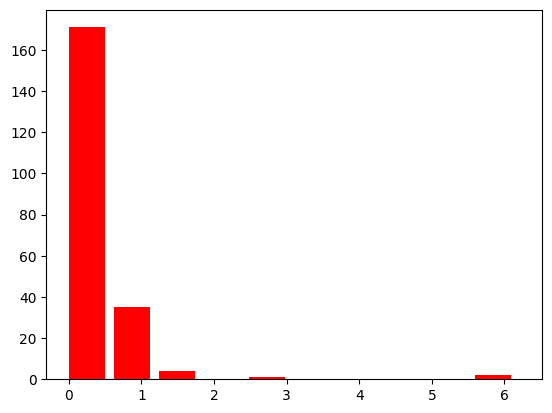

In [ ]:
plt.hist(glass['K'],width=0.5, color='red')
plt.show()

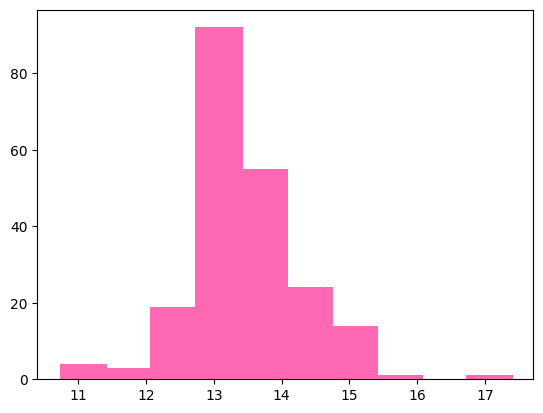

In [ ]:
plt.hist(glass['Na'],width=0.7, color='hotpink')
plt.show()

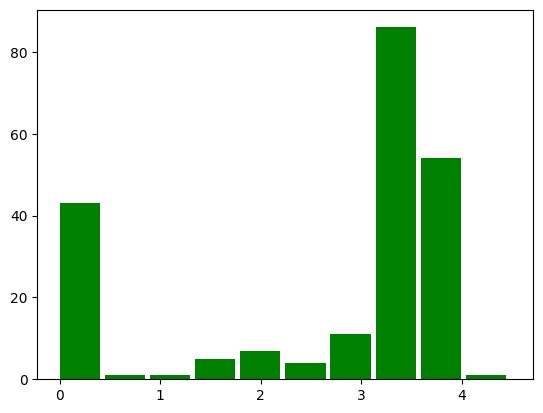

In [ ]:
plt.hist(glass['Mg'],width=0.4, color='green')
plt.show()

<Axes: xlabel='Al', ylabel='Density'>

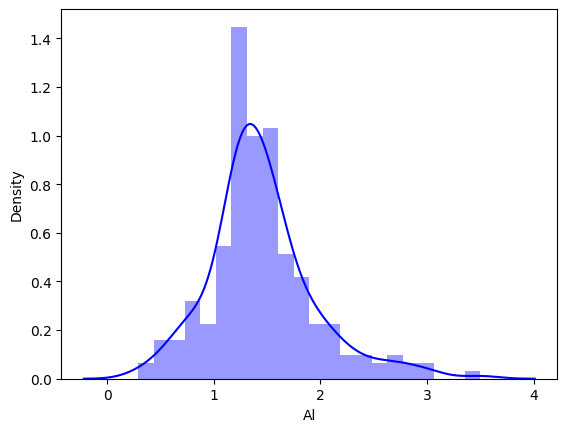

In [ ]:
# checking the data distributions
sns.distplot(glass['Al'],color='blue')

<Axes: xlabel='Si', ylabel='Density'>

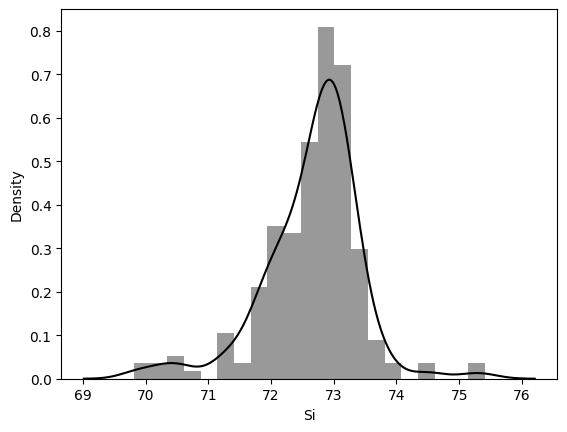

In [ ]:
sns.distplot(glass['Si'],color='black')

In [ ]:
# checking the data is normlized or not by using qq plot
from statsmodels.graphics.gofplots import qqplot

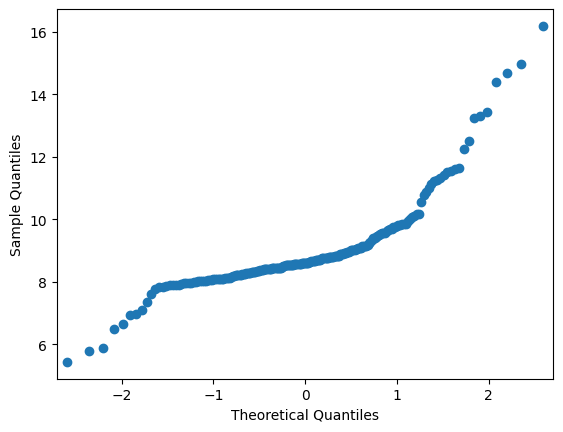

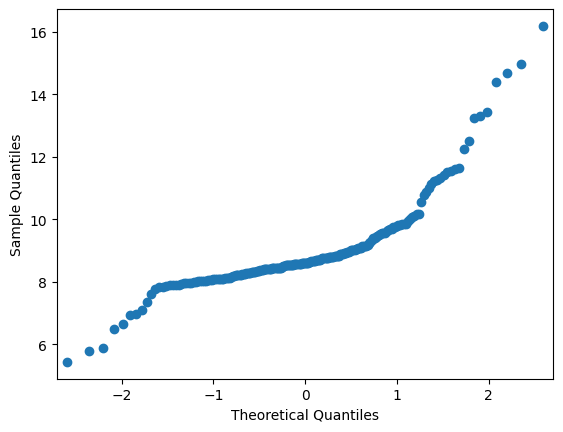

In [ ]:
qqplot(glass['Ca'],color='blue')

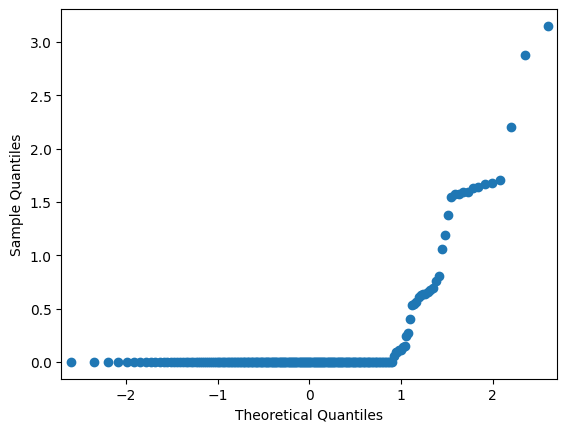

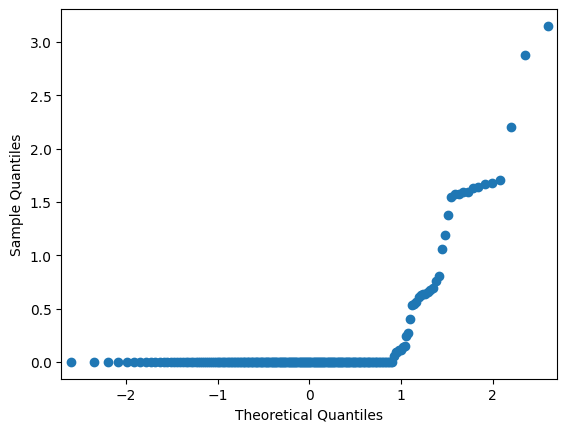

In [ ]:
qqplot(glass['Ba'])

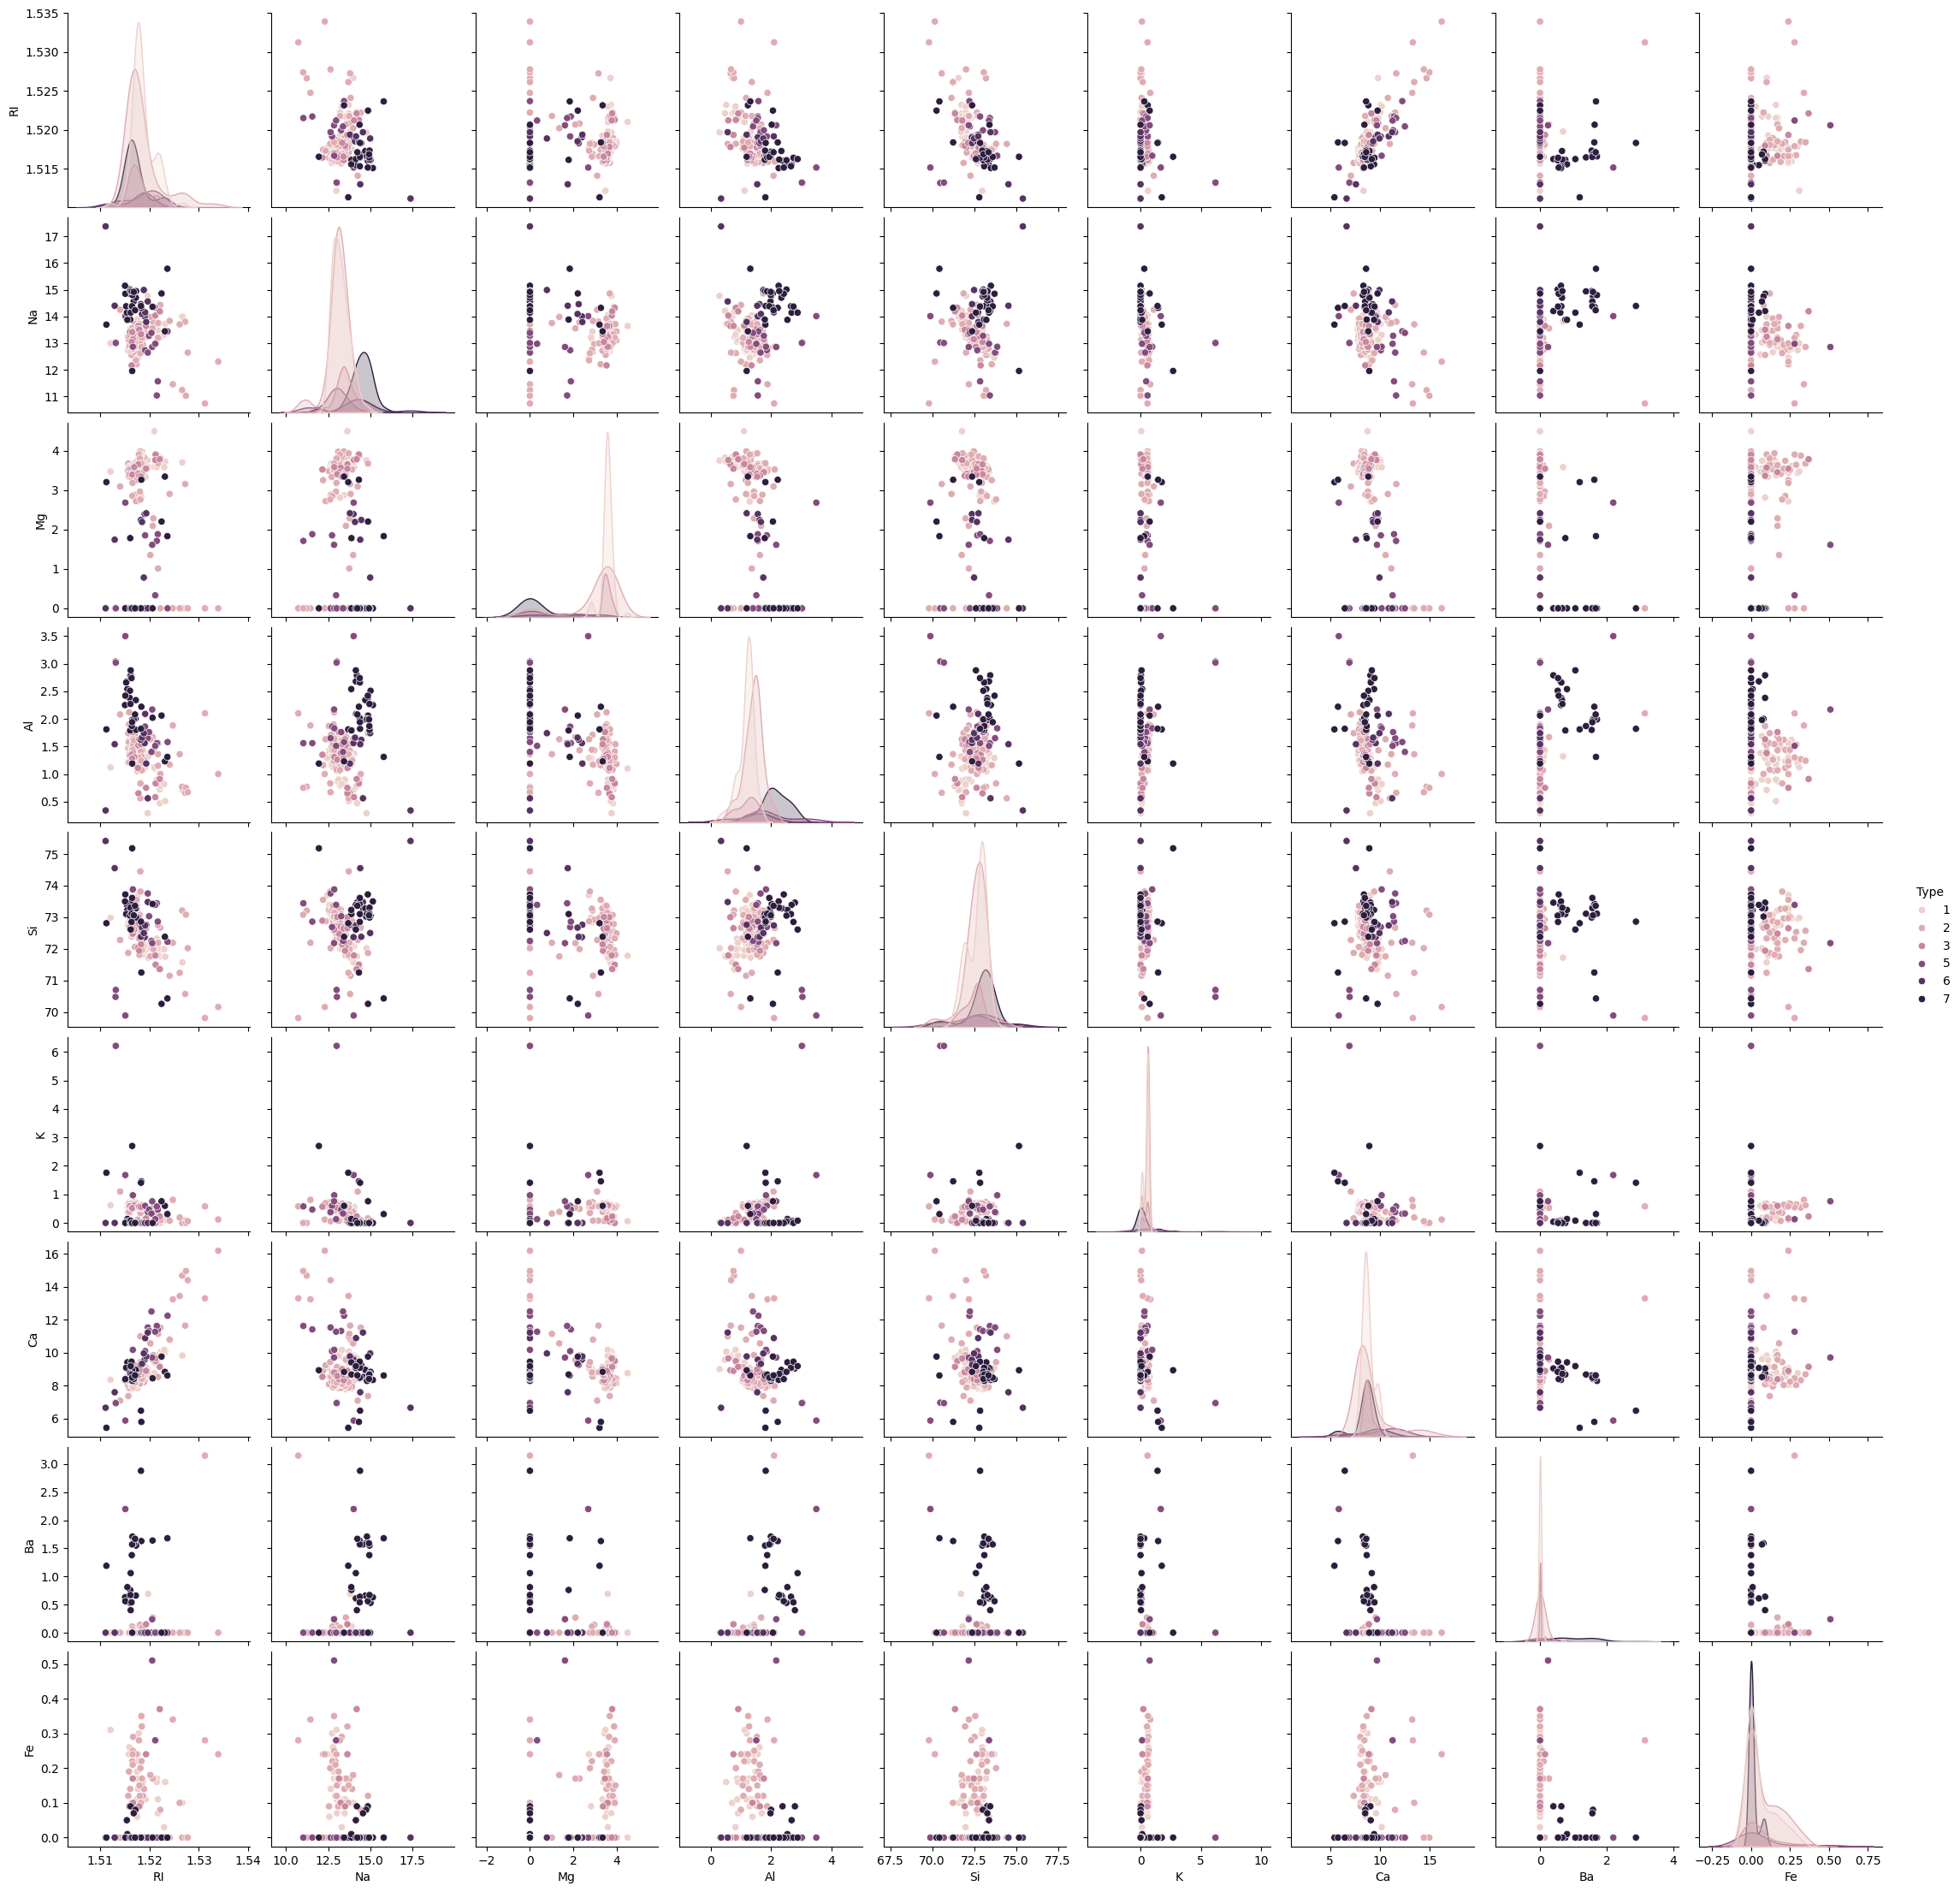

In [ ]:
# Pair Plot for checking the relationship between the columns
sns.pairplot(glass, hue='Type')

# 3: Data Preprocessing

In [ ]:
# Spliting the data into x and y
X=glass.iloc[:,0:9]
y=glass.iloc[:,9:]

In [ ]:
X.head(5)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [ ]:
y.head()

,Type
0,1
1,1
2,1
3,1
4,1


In [ ]:
# spliting the data by train test split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [ ]:
x_train.shape

(170, 9)

In [ ]:
x_test.shape

(43, 9)

In [ ]:
#### standarisation: We use the Standardscaler from sklearn library
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()
### fit vs fit_transform
X_train_scaled=scaler.fit_transform(x_train)

In [ ]:
X_train_scaled

array([[-0.88541869, -0.68469054,  0.53794711, ..., -0.71937041,
        -0.32871079, -0.57888487],
       [ 1.15976885,  0.92857052,  0.72707583, ...,  0.10531417,
        -0.32871079,  3.30297633],
       [ 2.65648929, -2.66184509, -2.02256475, ...,  4.01023088,
        -0.32871079, -0.57888487],
       ...,
       [-0.89202673, -0.22375881,  0.40701184, ..., -0.54315575,
        -0.32871079, -0.57888487],
       [-1.85349615,  1.18329596, -0.75685718, ..., -0.98721668,
        -0.32871079, -0.57888487],
       [ 2.85803443,  0.45550901,  0.2688024 , ...,  1.8674607 ,
        -0.32871079, -0.57888487]])

In [ ]:
x_test_scaled=scaler.transform(x_test)

In [ ]:
x_test_scaled

array([[-3.46863651e-01, -5.14873590e-01,  5.96140561e-01,
        -1.00579843e-01,  4.80674174e-01,  4.77983400e-01,
        -4.16281204e-01, -3.28710792e-01,  5.75181977e-01],
       [-1.08696383e+00,  1.15903639e+00, -2.02256475e+00,
         2.75284061e+00,  6.23873267e-01, -1.34840779e+00,
         6.30226523e-02,  9.27038300e-01, -5.78884866e-01],
       [ 9.64831749e-01, -4.54224678e-01,  6.32511468e-01,
        -1.17609986e+00, -3.91538482e-01, -8.31504625e-01,
         6.05763783e-01, -3.28710792e-01,  1.20467298e+00],
       [-7.82994112e-01,  9.40700306e-01, -2.02256475e+00,
         3.03818265e+00,  1.09252484e+00, -1.34840779e+00,
         3.48283079e-02,  4.56132391e-01,  3.65351642e-01],
       [-6.17793180e-01, -1.50980116e-01,  6.25237287e-01,
         2.72559754e-01, -1.18158396e-01,  7.53665089e-01,
        -6.77078890e-01, -3.28710792e-01,  2.46365499e+00],
       [ 3.02984340e+00, -9.51545759e-01, -2.02256475e+00,
        -1.61508762e+00, -7.82081463e-01, -1.279487

## Bagging Decision Tree classification

In [ ]:
Kfold= KFold(n_splits=7,random_state=42, shuffle=True)
cart = DecisionTreeClassifier()
num_tree = 100
model1 = BaggingClassifier(base_estimator=cart, n_estimators=num_tree, random_state=42)
results = cross_val_score(model1, X_train_scaled, y_train, cv=Kfold)
print(results.mean())

0.7280952380952382


In [ ]:
Kfold= KFold(n_splits=7,random_state=42, shuffle=True)
cart = DecisionTreeClassifier()
num_tree = 100
model1 = BaggingClassifier(base_estimator=cart, n_estimators=num_tree, random_state=42)

# Fit the model to the training data
model1.fit(X_train_scaled, y_train)

# Make predictions on the test data
predictions = model1.predict(x_test_scaled)

print(predictions)

[1 7 1 7 1 2 1 2 2 1 2 5 1 2 6 5 7 1 1 7 1 7 7 7 3 5 1 1 6 1 1 2 3 2 2 7 5
 3 2 2 1 2 7]


In [ ]:
model1.predict(X_train_scaled)

array([2, 3, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 7, 2, 5, 1, 1, 2, 1, 7, 5,
       2, 1, 2, 6, 1, 1, 1, 1, 1, 2, 2, 3, 1, 2, 5, 2, 1, 3, 2, 2, 1, 2,
       2, 2, 1, 2, 1, 3, 2, 2, 2, 2, 1, 7, 1, 1, 2, 2, 1, 1, 7, 6, 1, 1,
       2, 7, 3, 1, 1, 2, 3, 2, 3, 2, 1, 1, 2, 3, 6, 1, 7, 5, 2, 5, 1, 1,
       2, 1, 2, 1, 7, 3, 2, 1, 7, 1, 2, 5, 1, 3, 1, 2, 1, 2, 7, 5, 7, 1,
       2, 1, 1, 2, 2, 2, 7, 7, 2, 1, 1, 1, 6, 2, 1, 5, 2, 7, 2, 6, 7, 1,
       1, 2, 1, 5, 7, 5, 1, 1, 2, 1, 1, 3, 7, 7, 2, 1, 3, 7, 1, 1, 3, 2,
       3, 2, 2, 2, 2, 2, 2, 7, 1, 7, 2, 2, 1, 2, 6, 2])

# Random Forest classification

In [ ]:
num_trees = 300
max_features = 4
kfold = KFold(n_splits=7, random_state=42, shuffle = True)
model2 = RandomForestClassifier(n_estimators=num_trees, max_features=max_features, random_state=42)
results = cross_val_score(model2, X_train_scaled, y_train, cv=kfold)
print(results.mean())

0.7514285714285714


In [ ]:
Kfold= KFold(n_splits=7,random_state=42, shuffle=True)
max_features=4
num_tree = 100
model2 = RandomForestClassifier(n_estimators=num_trees, max_features=max_features, random_state=42)

# Fit the model to the training data
model2.fit(X_train_scaled, y_train)

# Make predictions on the test data
predictions = model1.predict(x_test_scaled)

print(predictions)

[1 7 1 7 1 2 1 2 2 1 2 5 1 2 6 5 7 1 1 7 1 7 7 7 3 5 1 1 6 1 1 2 3 2 2 7 5
 3 2 2 1 2 7]


In [ ]:
model2.predict(X_train_scaled)

array([2, 3, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 7, 2, 5, 1, 1, 2, 1, 7, 5,
       2, 1, 2, 6, 1, 1, 1, 1, 1, 2, 2, 3, 1, 2, 5, 2, 1, 3, 2, 2, 1, 2,
       2, 2, 1, 2, 1, 3, 2, 2, 2, 2, 1, 7, 1, 1, 2, 2, 1, 1, 7, 6, 1, 1,
       2, 7, 3, 1, 1, 2, 3, 2, 3, 2, 1, 1, 2, 3, 6, 1, 7, 5, 2, 5, 1, 1,
       2, 1, 2, 1, 7, 3, 2, 1, 7, 1, 2, 5, 1, 3, 1, 2, 1, 2, 7, 5, 7, 1,
       2, 1, 1, 2, 2, 2, 7, 7, 2, 1, 1, 1, 6, 2, 1, 5, 2, 7, 2, 6, 7, 1,
       1, 2, 1, 5, 7, 5, 1, 1, 2, 1, 1, 3, 7, 7, 2, 1, 3, 7, 1, 1, 3, 2,
       3, 2, 2, 2, 2, 2, 2, 7, 1, 7, 2, 2, 1, 2, 6, 2])

# AdaBoost Classification

In [ ]:
num_trees = 100
kfold = KFold(n_splits=7, random_state=42, shuffle = True)
model3= AdaBoostClassifier(n_estimators=num_trees, random_state=42)
results = cross_val_score(model3, X_train_scaled, y_train, cv=kfold)
print(results.mean())

0.40571428571428575


In [ ]:
Kfold= KFold(n_splits=7,random_state=42, shuffle=True)
num_tree = 100
model2 = AdaBoostClassifier(n_estimators=num_tree, random_state=42)

# Fit the model to the training data
model3.fit(X_train_scaled, y_train)

# Make predictions on the test data
predictions = model1.predict(x_test_scaled)

print(predictions)

[1 7 1 7 1 2 1 2 2 1 2 5 1 2 6 5 7 1 1 7 1 7 7 7 3 5 1 1 6 1 1 2 3 2 2 7 5
 3 2 2 1 2 7]


In [ ]:
model3.predict(X_train_scaled)

array([1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 7, 1, 2, 1, 1, 1, 1, 2, 2,
       1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 5, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 7, 1, 1, 2, 2, 7, 1,
       1, 1, 1, 2, 1, 1, 2, 7, 1, 1, 1, 1, 2, 1, 1, 2, 1, 7, 1, 2, 2, 1,
       1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 7, 1, 2, 1, 1, 2, 1])

# Stacking Ensemble for Classification

In [ ]:
from sklearn.linear_model import LogisticRegression

kfold = KFold(n_splits=7, random_state=42, shuffle = True)

# create the sub models
estimators = []
model4 = LogisticRegression(max_iter=100, random_state=42)
estimators.append(('logistic', model4))
model5 = DecisionTreeClassifier(random_state=42)
estimators.append(('cart', model2))
model6 = SVC(random_state=42)
estimators.append(('svm', model6))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, X_train_scaled, y_train, cv=kfold)
print(results.mean())

0.635


# Conclusion

# Here we perform the Random forest classification on Glass dataset by using bagging classifier and adaboosting classifier methods.

# There is diffirences between bagging classifier and adaBoosting classifier.

# The Bagging Classifier accuracy is 0.7280

# The adaBoosting Classifier accuracy is 0.4057



## We choose the Bagging classifier for this dataset because the bagging classifier gives us batter accuracy